In [1]:
import UsefulFunctions as uf
import pandas as pd
import pickle

### Required User Defined Inputs

In [2]:
#list input files

inputfiles = ["../SiPMData/Mar082023Cosmic/1.txt"]

#inputfiles = ["../../Scintillator-Scanner/Convert2Txt/LargeData/1-2.txt"]
#numinput = 242
#for i in range(numinput):
#    inputfiles.append(f"../../Scintillator-Scanner/Convert2Txt/LargeData/1-{i+1}002.txt")
    #print(inputfiles,'\n')

#choose which stats to calculate
stats = [True,                         #chi^2
         True,True,True,True,        #amplitude & time (raw, base, smooth, fit)
         False]                        #CDF time -- not yet implemented

#name your output (pkl) file
#note: all input files are zipped into one output
outputname = "Mar082023Cosmic"
#print(inputfiles)

### Optional User Defined Inputs

In [3]:
###    Optional parameters (and the default values):

#rmscut = 1.5
residualcut = 1000        #Default: 5 -- tolerance of the residual cut -- data with residuals above this value are removed via smoothing
channels = [1,2,3,4]        #Default: [1,2,3,4] -- choose which channels to analyze; must be a list!
#eventstart=1
verbose=True        #Default: False -- Set to True to see a few of the waveforms and the calculated values 
#show_residual=False        #Default: False -- Shows the residuals along with the waveforms when verbose=True
#vieweventstart=1        #Default: 1 -- The event number where events start being displayed when verbose=True
#viewevents=10        #Default: 10 -- The number of events displayed when verbose=True

#    ***ONLY NEEDED IF USING get_time_fit OR get_amplitude_fit*** 
#    initial parameters for waveform fit -- if fit does not converge, set verbose=True and try to determine what the typical start/end times are;
#    The fit is very sensitive to the initial start/end parameters 

start = 65
end = start+25
p0=[(0,60,10,65,-1000,0),       #ch1 initial parameters
    (0,start,1,end,-50,100),       #ch2 initial parameters
    (0,start,1,end,-100,100),        #ch3 initial parameters
    (0,start,1,end,-100,100)]        #ch4 initial parameters


### Get Dataframe!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File: ../SiPMData/Mar082023Cosmic/1.txt
Event Number 1
Channel 1 RMS: 25321.52
fit params: -6.16, 65.1, 64.86, 72.5, -262.25, 1197.250
Channel 2 RMS: 43414.67
fit params: -8.33, 63.5, 86.33, 71.8, -74.53, 2065.860
Channel 3 RMS: 7583.61
fit params: -8.61, 66.2, 37.76, 74.5, -52.25, 1468.702


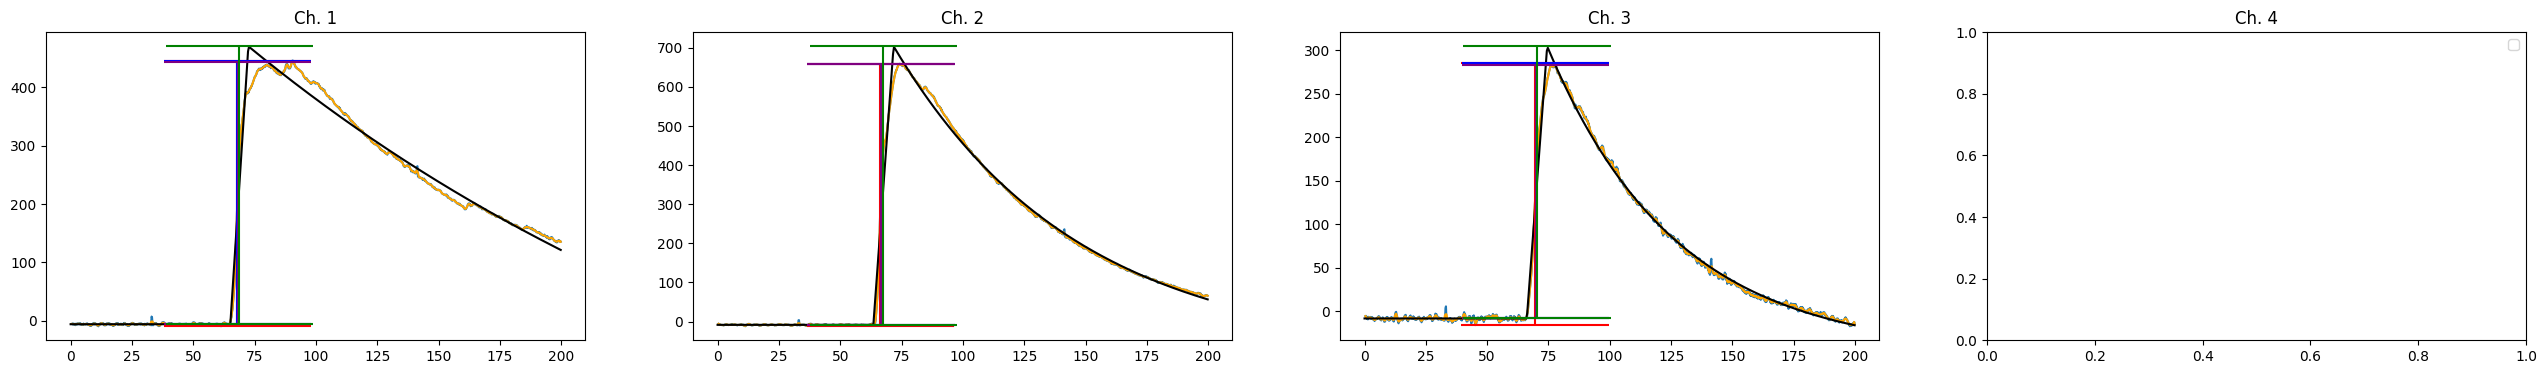

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 2
Channel 1 RMS: 6906.81
fit params: -0.37, 63.7, 42.79, 69.8, -145.16, 577.984
Channel 2 RMS: 38086.33
fit params: -7.49, 62.9, 97.65, 69.5, -102.26, 1620.359
Channel 3 RMS: 4274.72
fit params: -9.15, 64.6, 27.75, 73.1, -51.00, 1114.008


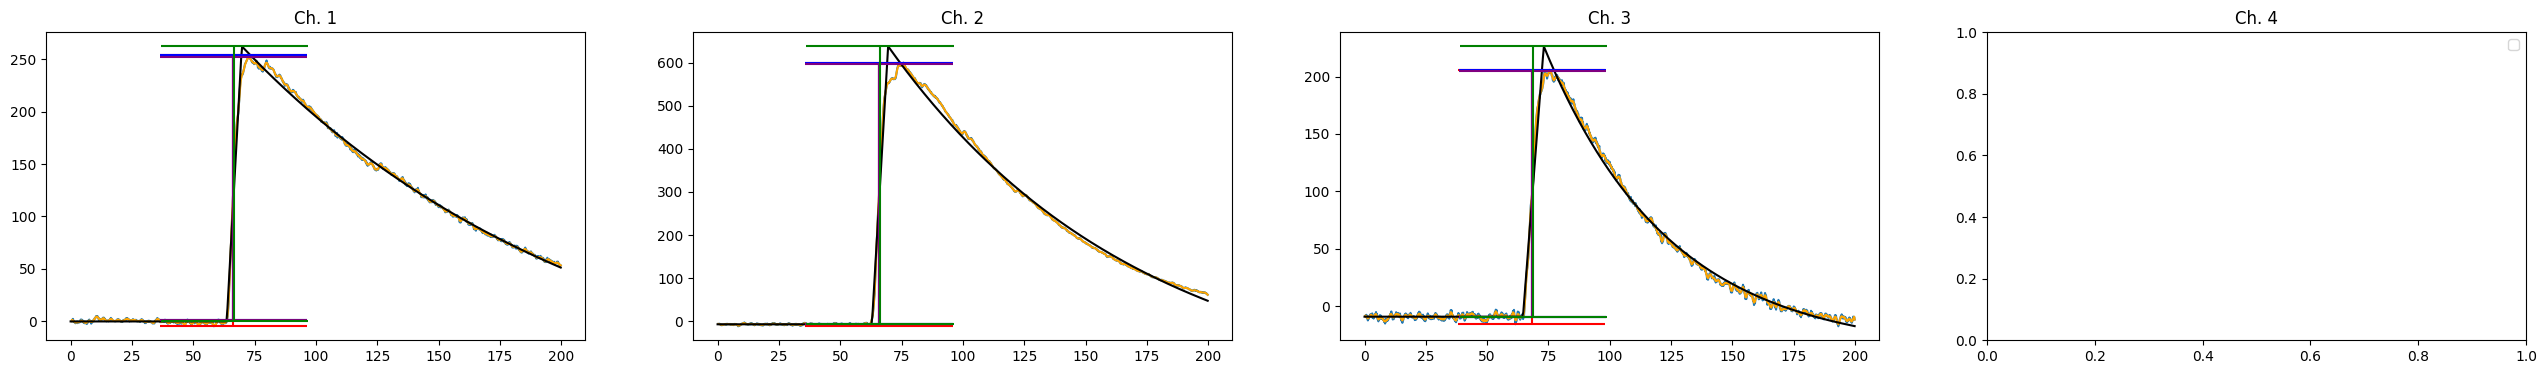

/home/arratia/Scintillator-Studies/UsefulFunctions.py:14: RuntimeWarning: overflow encountered in exp
  funclist = [lambda x: Ci, lambda x: m*x+(Ci - m*start), lambda x: (A*(np.exp(x/d)-np.exp(end/d)) + m*(end-start) + Ci)]
/home/arratia/Scintillator-Studies/UsefulFunctions.py:14: RuntimeWarning: invalid value encountered in subtract
  funclist = [lambda x: Ci, lambda x: m*x+(Ci - m*start), lambda x: (A*(np.exp(x/d)-np.exp(end/d)) + m*(end-start) + Ci)]
/home/arratia/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 3
Channel 1 RMS: 8558.12
fit params: -6.13, 63.8, 23.83, 75.2, -713.13, 1439.524
Channel 2 RMS: 72607.17
fit params: -7.71, 64.4, 149.45, 67.2, -0.34, -27.177
Channel 3 RMS: 23947.64
fit params: -8.08, 65.7, 65.21, 74.3, -50.96, 2703.979


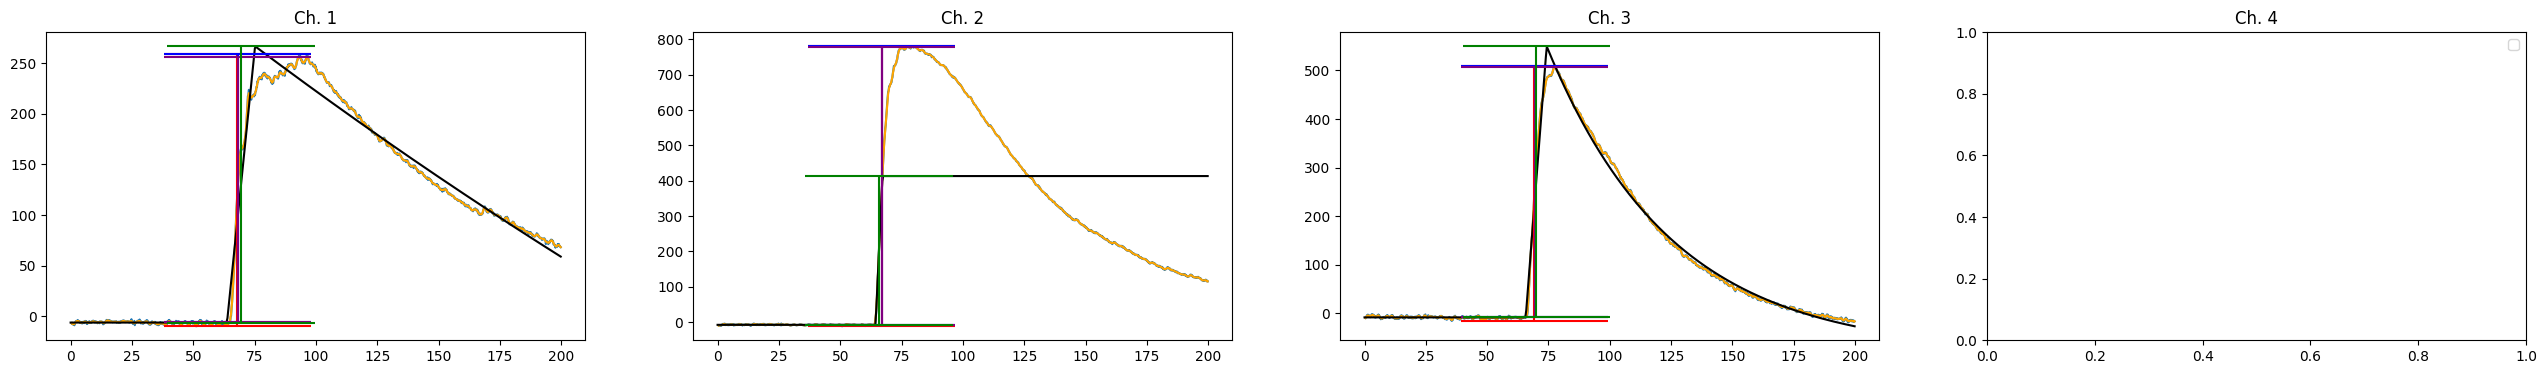

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 4
Channel 1 RMS: 6731.87
fit params: -5.80, 61.7, 25.41, 72.2, -112.73, 595.980
Channel 2 RMS: 62631.52
fit params: -7.63, 61.0, 97.84, 69.2, -145.96, 2003.083
Channel 3 RMS: 17329.44
fit params: -8.15, 63.7, 47.68, 73.5, -55.49, 2004.216


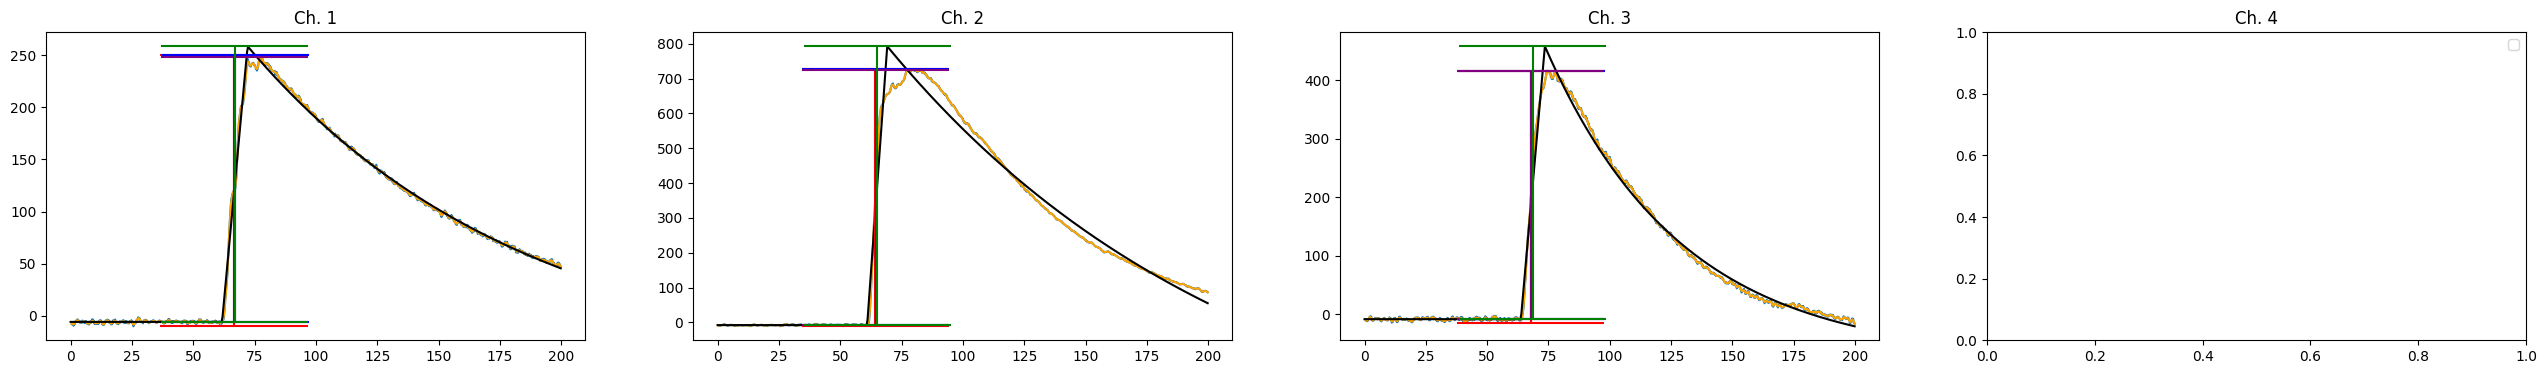

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 5
Channel 1 RMS: 9311.14
fit params: -5.94, 65.0, 53.01, 70.6, -196.36, 670.410
Channel 2 RMS: 36089.63
fit params: -7.78, 62.9, 61.15, 73.2, -88.92, 1732.052
Channel 3 RMS: 10545.94
fit params: -8.52, 65.6, 41.52, 74.5, -53.32, 1685.558


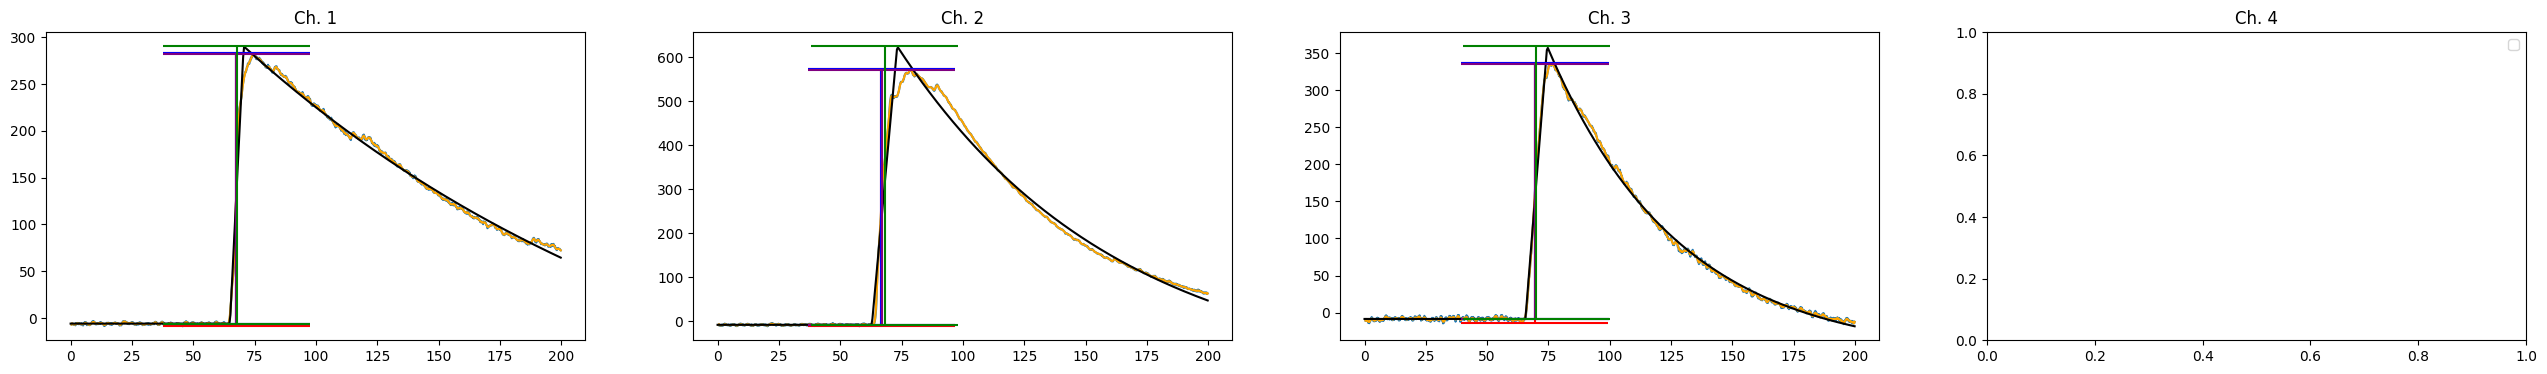

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 6
Channel 1 RMS: 3480.44
fit params: -5.96, 59.2, 15.42, 70.3, -258.62, 346.051
Channel 2 RMS: 27785.77
fit params: -7.27, 59.3, 70.54, 67.1, -118.83, 1295.797
Channel 3 RMS: 5669.40
fit params: -8.58, 61.2, 27.73, 70.9, -52.16, 1165.218


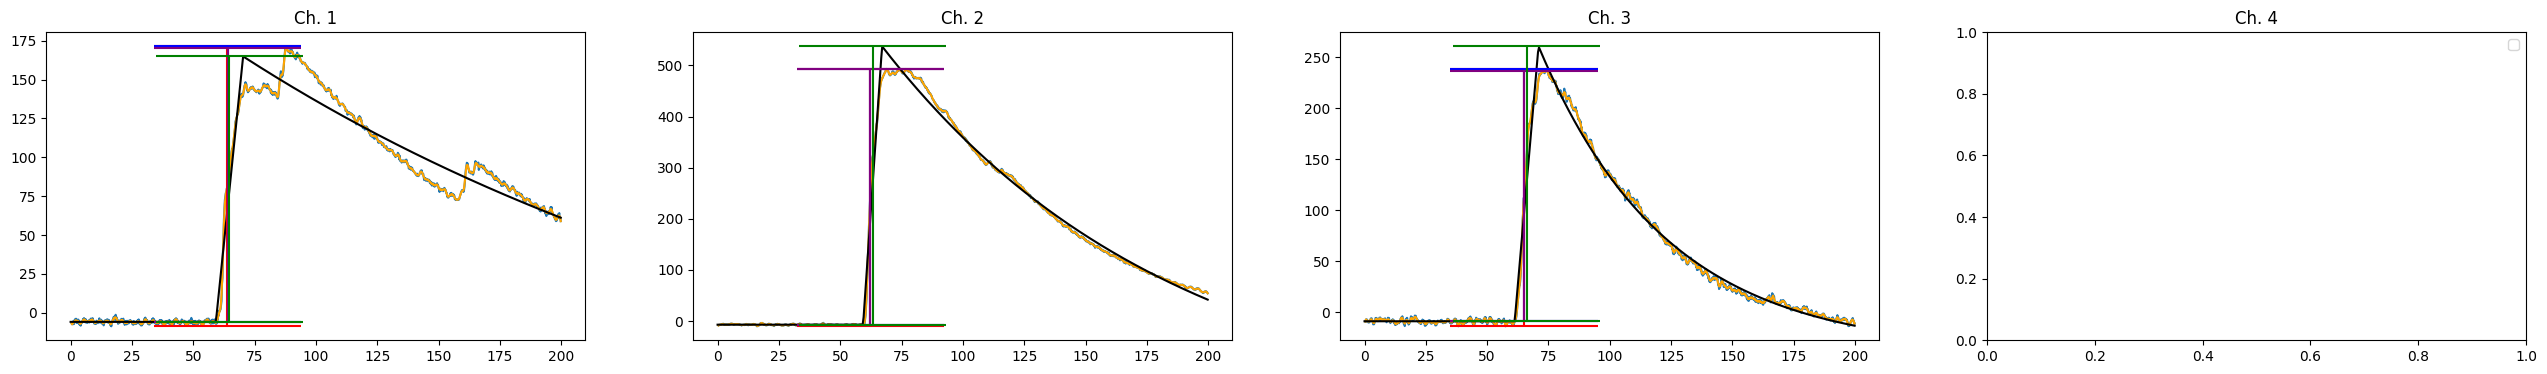

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 7
Channel 1 RMS: 6249.07
fit params: -5.16, 61.2, 26.02, 70.6, -224.42, 606.545
Channel 2 RMS: 39738.05
fit params: -6.72, 59.6, 76.89, 68.4, -85.95, 1725.484
Channel 3 RMS: 4164.45
fit params: -8.63, 62.6, 31.94, 70.0, -48.54, 1093.460


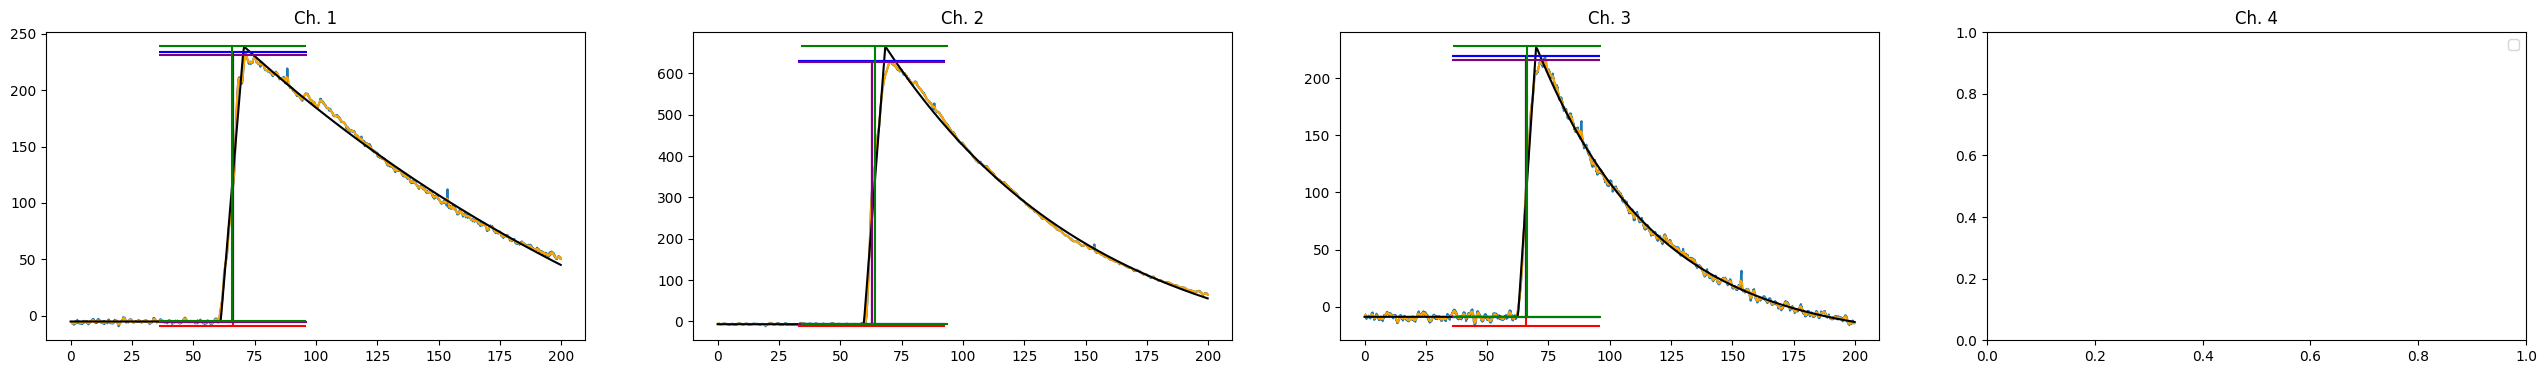

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 8
Channel 1 RMS: 4759.28
fit params: -6.02, 60.6, 15.93, 73.5, 2716545.32, -3635922.167
Channel 2 RMS: 24547.51
fit params: -8.18, 60.4, 76.18, 67.4, -83.86, 1376.841
Channel 3 RMS: 5418.27
fit params: -8.65, 62.4, 27.56, 71.7, -58.46, 1025.029


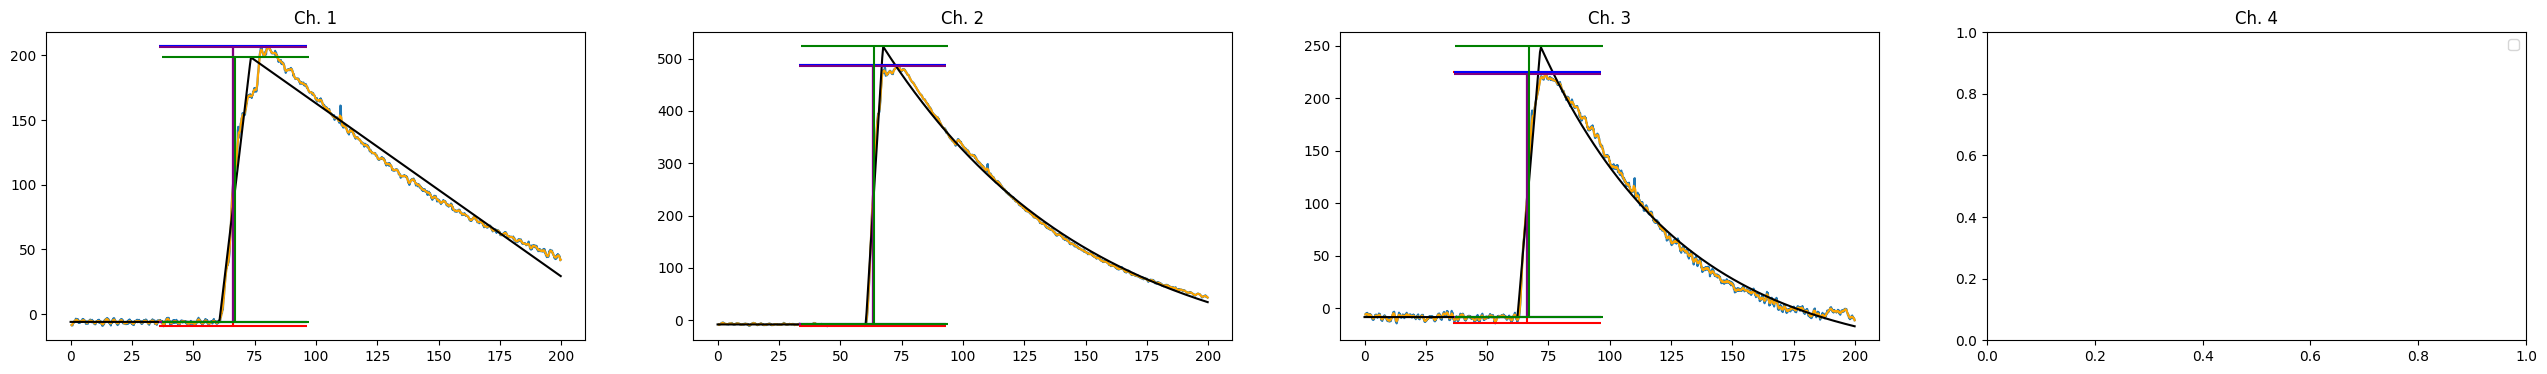

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 9
Channel 1 RMS: 31257.69
fit params: -4.78, 63.7, 72.97, 71.4, -139.45, 1237.359
Channel 2 RMS: 60397.97
fit params: -8.33, 64.8, 91.54, 73.7, -97.11, 2153.378
Channel 3 RMS: 7477.34
fit params: -8.26, 66.1, 32.12, 75.8, -48.91, 1639.298


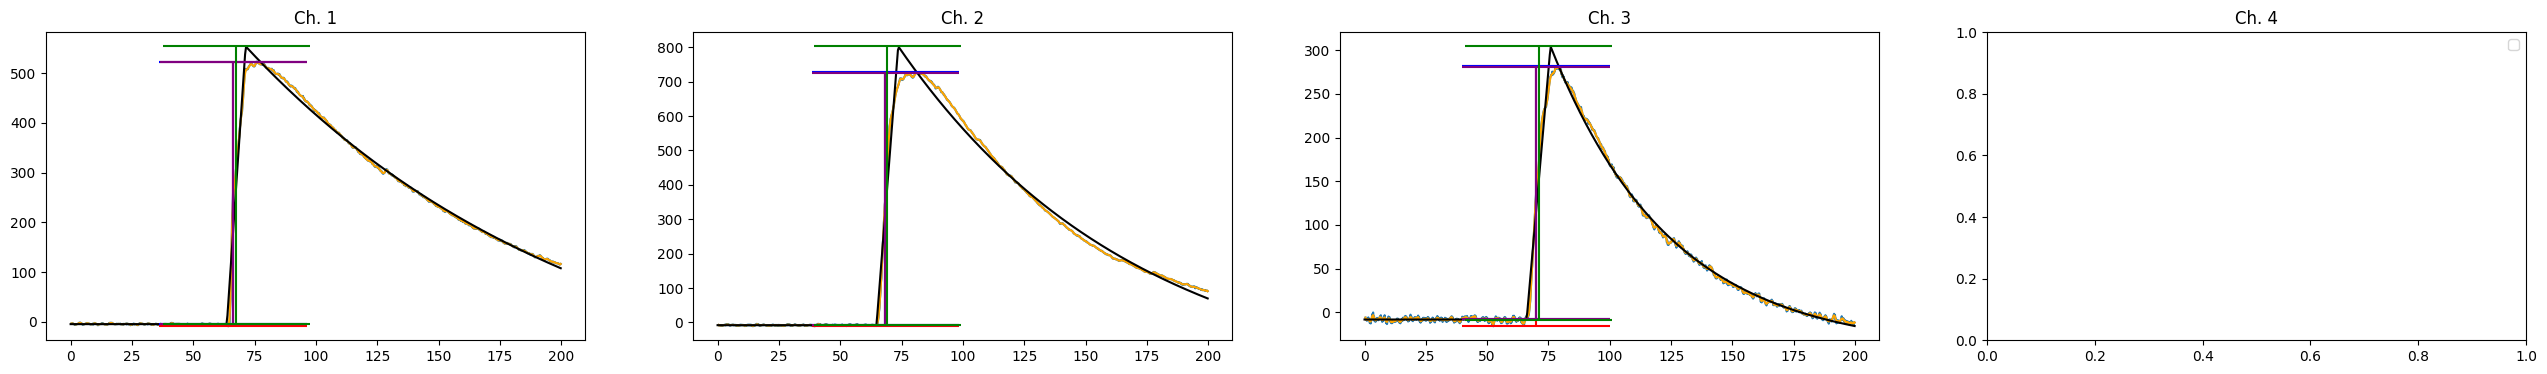

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 10
Channel 1 RMS: 19166.90
fit params: -6.61, 62.5, 37.08, 73.9, -273.91, 1185.250
Channel 2 RMS: 76347.57
fit params: -7.54, 62.0, 132.14, 65.3, -1.45, -44.071
Channel 3 RMS: 13721.20
fit params: -8.45, 63.5, 42.98, 73.3, -50.18, 2036.013


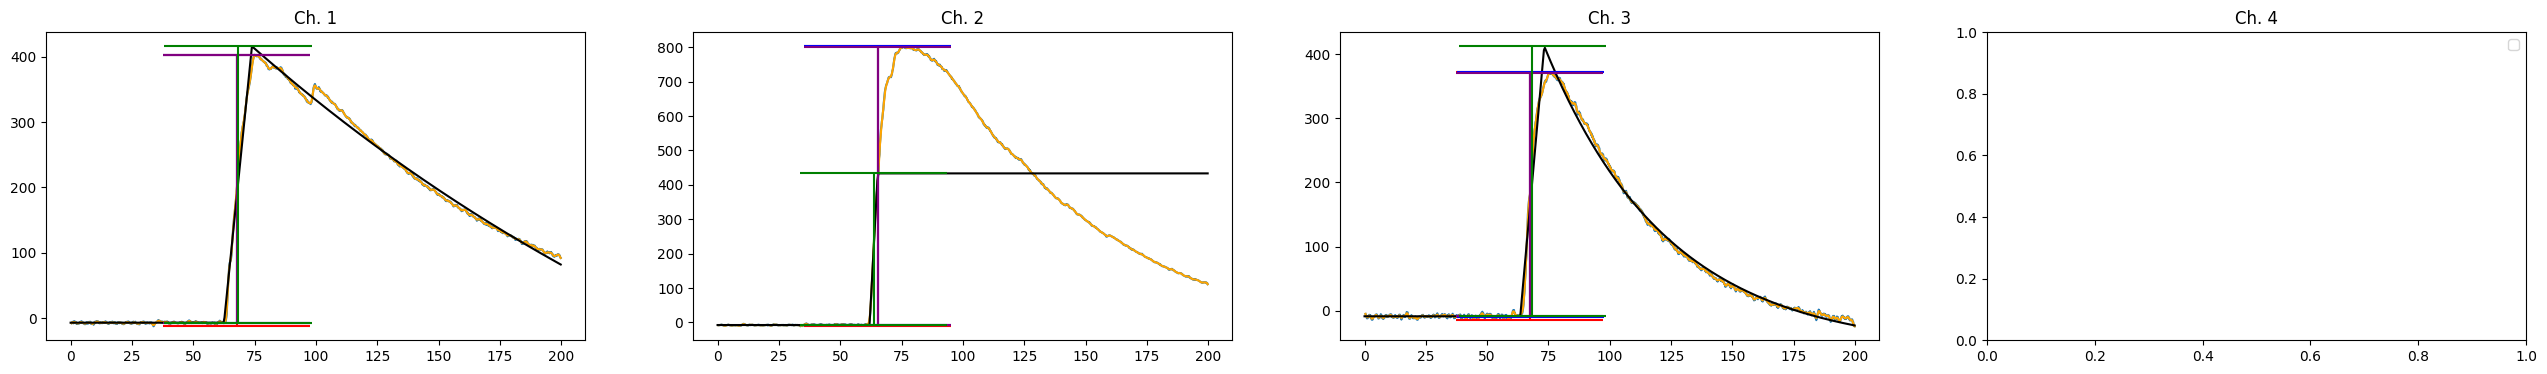

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Event Number 11
Channel 1 RMS: 5173.76
fit params: -2.49, 60.4, 17.60, 73.0, -215.02, 557.246
Channel 2 RMS: 37250.97
fit params: -7.79, 60.5, 62.37, 70.8, -91.74, 1676.469
Channel 3 RMS: 2149.85
fit params: -8.08, 62.5, 14.33, 72.5, -175.28, 460.429


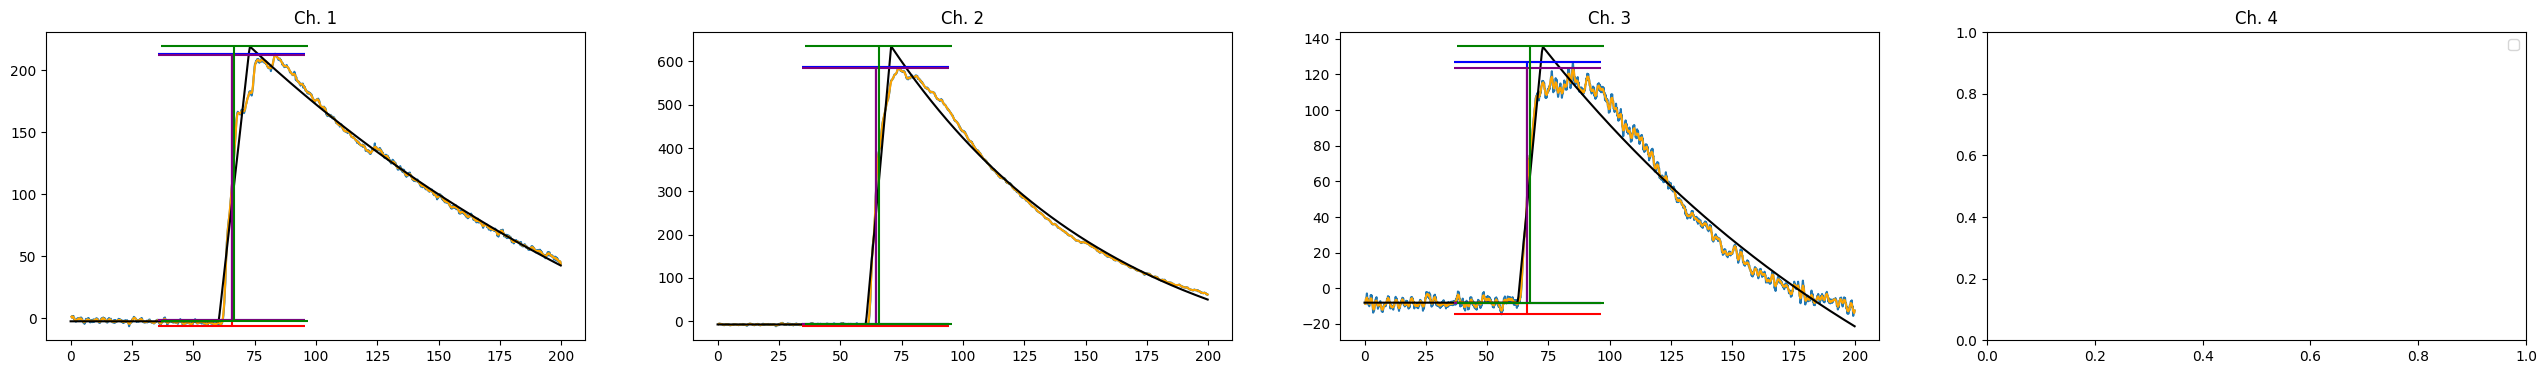

/home/arratia/Scintillator-Studies/UsefulFunctions.py:14: RuntimeWarning: overflow encountered in multiply
  funclist = [lambda x: Ci, lambda x: m*x+(Ci - m*start), lambda x: (A*(np.exp(x/d)-np.exp(end/d)) + m*(end-start) + Ci)]


Event: 400
Done! Total events analyzed: 400


In [4]:
#print(inputfiles)
dataframe = uf.get_dataframe(inputfiles,stats,verbose=True,residualcut = 100000,channels = [1,2,3],p0=p0)#add ",maxevent=10" to your parameters to only convert that many events
pd.to_pickle(dataframe, f"{outputname}.pkl")

In [ ]:
#read the dataframe from the output pkl file
with open(f'{outputname}.pkl', 'rb') as f:
    fout = pickle.load(f)
fout